# Challenge 1
## Team name: Team Hilbert Space
### Michael Moen Allport & Jonas Sandberg
### Student IDs: 768687 + 747903

# Exploratory Data Analysis

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

In [2]:
with open('datasets/challenge1_train.csv') as train_csv:
        df = pd.read_csv(train_csv, skipinitialspace=True)
labels = df['target']
features = df.drop(columns=['target','id'])
df.head()

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,0,0,254e988c9,0.0,6.8928,a,0.0,0.2,0.3,3829ad8a4,...,79df04ed6,A,2.0,51.0,3.0,1.0,D,0.0,6d3db6c57,a7059911d
1,1,0,e3282379d,0.0,6.8098,n,NaN,0.0,0.1,fd943bc67,...,2815e62ea,U,0.0,10.0,1.0,3.0,E,0.0,abce980f5,e60e65034
2,2,0,c362abead,1.0,6.7761,k,0.0,0.1,0.0,b770c0db2,...,8496c8e33,Q,1.0,16.0,3.0,0.0,NaN,0.0,63dde2492,d3d8f55e0
3,3,0,84ab3eece,0.0,6.9302,i,3.0,0.2,0.3,5968f0acd,...,b31517d23,NaN,1.0,63.0,3.0,0.0,E,0.0,cb0d7da76,3600c6e91
4,4,0,a16717598,0.0,7.0238,e,4.0,0.1,0.4,221405824,...,6327fb08b,H,1.0,26.0,NaN,3.0,A,0.0,8ce034bb6,93360bbc9


We see that we have a variety of data types. Some columns are hex values, others are categorical, float or boolean values.
Lets check out the amount of missing values to see if there any outliers:

<BarContainer object of 25 artists>

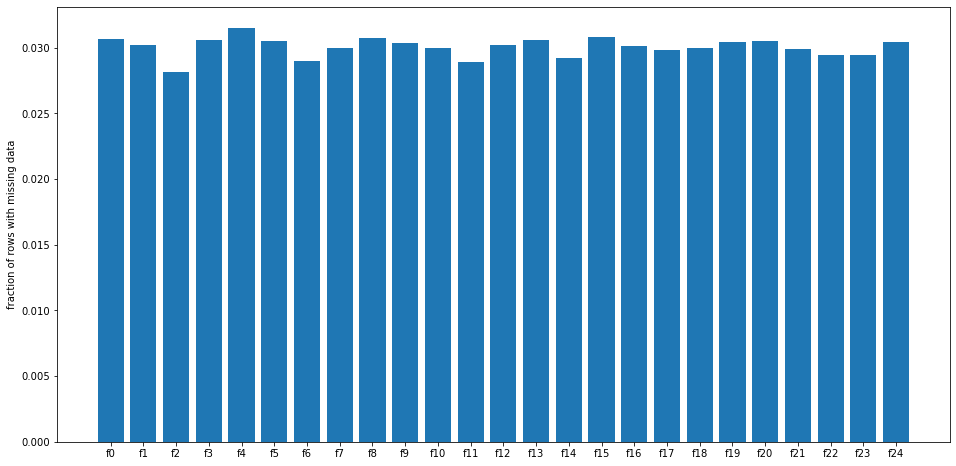

In [3]:
import matplotlib.pyplot as plt
null_counts = features.isna().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index)
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

While we do have a fair amount of missing values, 3% is manageable and there are no outliers between columns.

In [4]:
features.describe()

,f1,f2,f4,f5,f6,f8,f10,f11,f12,f13,f17,f18,f19,f20,f22
count,48492.000000,48594.000000,48424.000000,48473.000000,48552.000000,48463.000000,48500.00000,48553.000000,48491.00000,48471.000000,48509.000000,48501.000000,48478.000000,48475.000000,48530.000000
mean,0.093356,6.988378,3.094148,0.146263,0.310677,6.350866,0.53732,0.276626,4.11532,0.037251,0.648003,62.147378,1.955196,1.889964,0.183721
std,0.290933,0.152945,1.845653,0.065318,0.185038,3.455614,0.49861,0.447334,2.03611,0.048348,0.823160,33.086578,0.853246,1.529719,0.387261
min,0.000000,6.521800,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,6.870225,1.000000,0.100000,0.200000,3.000000,0.00000,0.000000,2.00000,0.000000,0.000000,32.000000,1.000000,0.000000,0.000000
50%,0.000000,6.987500,4.000000,0.200000,0.400000,6.000000,1.00000,0.000000,5.00000,0.000000,0.000000,65.000000,2.000000,2.000000,0.000000
75%,0.000000,7.102300,5.000000,0.200000,0.500000,8.000000,1.00000,1.000000,6.00000,0.100000,1.000000,94.000000,3.000000,3.000000,0.000000
max,1.000000,7.479400,5.000000,0.200000,0.500000,12.000000,1.00000,1.000000,7.00000,0.100000,3.000000,104.000000,3.000000,4.000000,1.000000


While pandas describe() is decent for gettting a brief overview of the dataset, it can sometimes be misleading. A standard deviation of 3.4 in column f8 might be worrying until one realizes that the column has 12 distinct values and is probably best represented ordinally.

A more powerful tool is "Pandas profiling", and is far more useful for data exploration.

In [5]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df.drop(columns=['id']))
profile

There's a lot going on in this report, so let's break the different aspects into parts.

# Data types

We essentially have five different data types:

In [6]:
numeric_features     = ['f2', 'f18']
hexadecimal_features = ['f0', 'f7', 'f15', 'f23', 'f24']
boolean_features     = ['f1', 'f10', 'f11', 'f13', 'f22']
ordinal_features     = ['f4', 'f5', 'f6', 'f8', 'f12', 'f17', 'f19', 'f20']
categorical_features = ['f3', 'f9', 'f14', 'f16', 'f21']

We have 5 columns with hexadecimal numbers, so we need to convert them to a numeric type. It could also be argued that certain columns with hexadecimal numbers should be represented as categorical features if the number of distinct rows is low enough, for example column f23 and f24.

Note that during model selection, we experimented with different ways to encode these data types, comparing the effect on our performance metrics. Essentially we treat boolean and hexadecimal features as numeric values, normalizing them by mean and standard deviation. For ordinal features, we tried one-hot encoding them, encoding them ordinally (from 0 to n_categories -1), and treating them numerically.

In [7]:
df['f9'].value_counts()

Fl    900
DN    750
Sz    730
PS    474
vq    473
     ... 
MX     11
eA     11
Zv     10
gV      8
vQ      4
Name: f9, Length: 190, dtype: int64

By inspecting the field 'f9', we see that it should be interpreted categorically, although it has a high cardinality. The high number of columns after one-hot encoding proved problematic for later processing, so we decided to drop the column and found that it did not adversely affect prediction performance.

In [8]:
features = features.drop(columns=['f9'])
categorical_features.remove('f9')

# Imbalanced classes

We see that the targets are heavily favored towards "0". This needs to be dealt with, so our model doesn't heavily lean towards guessing "0". It also impacts the metrics we use to evaluate our model, given that a model that always guesses "0" will have an 80% accuracy.

In [9]:
labels.value_counts(normalize=True)

0    0.81652
1    0.18348
Name: target, dtype: float64

# Duplicates
We inspect the training set and find that we have no duplicates, so we don't need to drop them.

In [10]:
df.duplicated().any()

False

# Correlations

We see that the only correlation relationships are very weak. This is good, because correlated columns can have adverse effects on certain classification algorithms, like Logistic Regression and Random Forest. However, the data is not processed, so the report might be misleading - hex columns are treated as categorical values, for example. Let's pre-process and quantify how strong the relationships are - to do that we need to use different algorithms for the numeric features and categorical features. As far as we aware, there is no clear-cut way to quantify the relationship between categorical columns, so we focus on numerical column correlation.

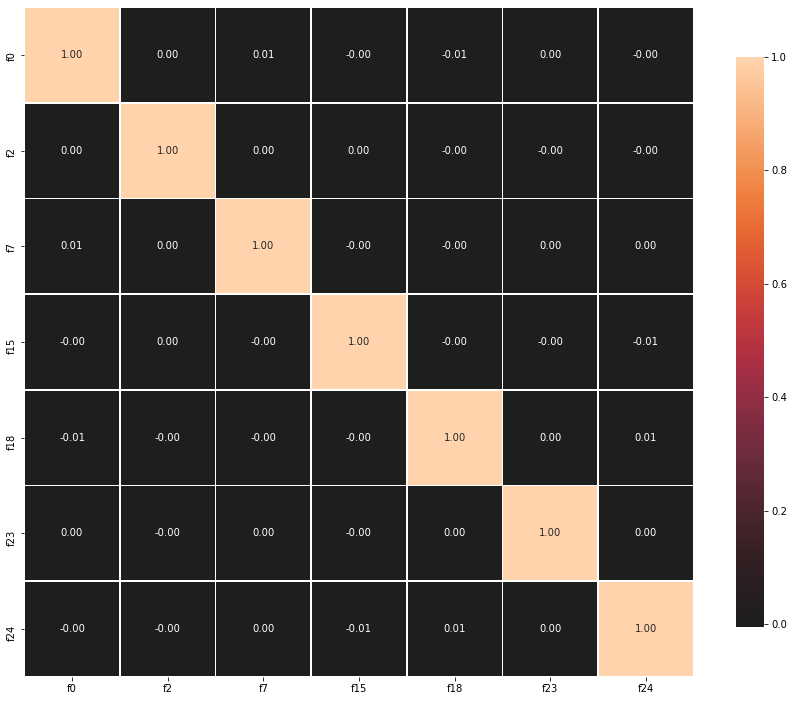

In [13]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from itertools import combinations
from scipy.stats import chi2_contingency, pearsonr

def conv_hex(x):
    try:
        return int(x, 16)
    except ValueError:
        return np.nan
    except TypeError:
        return np.nan
    
def analyze_corr(features, labels):
    # Need to impute, pearson doesn't take nan values
    median_impute = SimpleImputer(strategy='median')

    for i in range(25):
        feature = "f" + str(i)
        if feature in hexadecimal_features:
            features[feature] = features[feature].apply(lambda x: conv_hex(x))
            features[feature] = median_impute.fit_transform(np.array(features[feature]).reshape(-1,1))

        if feature in (numeric_features):
            features[feature] = median_impute.fit_transform(np.array(features[feature]).reshape(-1,1))

    
    min_max_scaler = MinMaxScaler()
    
    df_num = features[features.columns & (numeric_features + hexadecimal_features)]
    df_num = pd.DataFrame(min_max_scaler.fit_transform(df_num), columns=df_num.columns, index=df_num.index)
    
    correlations = df_num.corr(method="pearson")

    fig, ax = plt.subplots(figsize=(15,15))
    heatmap = sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

analyze_corr(features.copy(), labels)

# Preprocessing
## Transform hexadecimal features to numeric

In [14]:
for f in hexadecimal_features:
    features[f] = features[f].apply(lambda x: conv_hex(x))

features.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1.001453e+10,0.0,6.8928,a,0.0,0.2,0.3,1.507609e+10,4.0,0.0,...,3.271454e+10,A,2.0,51.0,3.0,1.0,D,0.0,2.932418e+10,4.483459e+10
1,6.097694e+10,0.0,6.8098,n,NaN,0.0,0.1,6.806960e+10,2.0,1.0,...,1.076038e+10,U,0.0,10.0,1.0,3.0,E,0.0,4.611909e+10,6.175525e+10
2,5.244838e+10,1.0,6.7761,k,0.0,0.1,0.0,4.924192e+10,3.0,1.0,...,3.559159e+10,Q,1.0,16.0,3.0,0.0,NaN,0.0,2.680777e+10,5.686738e+10
3,3.561304e+10,0.0,6.9302,i,3.0,0.2,0.3,2.400079e+10,6.0,0.0,...,4.807206e+10,NaN,1.0,63.0,3.0,0.0,E,0.0,5.450654e+10,1.449633e+10
4,4.332621e+10,0.0,7.0238,e,4.0,0.1,0.4,9.147800e+09,5.0,1.0,...,2.661703e+10,H,1.0,26.0,NaN,3.0,A,0.0,3.781606e+10,3.951668e+10


## Split data into train and test set
20% of the dataset is held off for testing our model. We make sure to only fit our models on the training data, so that there is no leakage of information from the test set into the model. We use a stratified split so that the class balance is maintained between the train and test sets.

In [15]:
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels)

## Imputation, normalization and one-hot encoding
We use a ColumnTransformer to distinguish between numeric and categorical features for preprocessing. While it is used to transform both training and test data, it is only fit on the training set.

We use the IterativeImputer and standard scaling for normalization of numeric features. For categorical features, we use one-hot encoding while ignoring missing values.

In [16]:
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = make_pipeline(
    IterativeImputer(random_state=0),
    StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore')
)
    
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features + hexadecimal_features + boolean_features + ordinal_features),
    (categorical_transformer, categorical_features),
)

X_train = pd.DataFrame(preprocessor.fit_transform(X_train_pre, y_train))
X_test  = pd.DataFrame(preprocessor.transform(X_test_pre))

X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,...,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-3.483436e-15,-4.725109e-17,-5.879741e-17,-9.947598e-18,-5.693224e-17,1.957545e-16,-3.367973e-16,-3.961276e-17,-4.103384e-17,-1.278977e-17,...,0.06000,0.009250,0.029650,0.199850,0.045675,0.025150,0.175750,0.251225,0.272575,0.029775
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,0.23749,0.095732,0.169622,0.399892,0.208782,0.156583,0.380612,0.433723,0.445290,0.169968
min,-3.092265e+00,-1.875380e+00,-1.724495e+00,-1.727995e+00,-1.740075e+00,-1.813053e+00,-1.679248e+00,-3.249483e-01,-1.092867e+00,-6.289729e-01,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.600567e-01,-8.635093e-01,-8.289182e-01,-8.734546e-01,-8.208150e-01,-7.922488e-01,-7.878584e-01,-3.249483e-01,-1.092867e+00,-6.289729e-01,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.071618e-03,5.637339e-02,-1.110456e-03,5.640337e-05,-2.521219e-03,-3.299107e-02,-1.369871e-03,-3.249483e-01,9.433235e-01,-6.289729e-01,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.348124e-01,9.149306e-01,8.480808e-01,8.303076e-01,8.162007e-01,8.529513e-01,6.950396e-01,-3.249483e-01,9.433235e-01,1.637383e+00,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,3.261427e+00,1.282884e+00,1.793192e+00,1.768454e+00,1.809491e+00,1.793222e+00,2.054161e+00,3.170662e+00,9.433235e-01,1.637383e+00,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model selection
## Evaluation
Because there is no perfect metric to evaluate the performance of a model, and we don't know which aspect of performance is the most valuable in this case, we decided to look at both the ROC AUC score and the F1 score while we were experimenting with different models. The ROC AUC score summarizes the TPR (true positive rate) and FPR (false positive rate) at different discrimination thresholds, and is independent of class distribution (which in our case is unbalanced), so it will be the primary metric by which we evaluate performance. Furthermore, the F1 score represents an average of precision and recall.

Seeing as we know nothing about the problem domain, but we have a minority of 1s in the target, we make the assumption that having a high recall of the 1 class is more important than a high recall of the 0 class.

In [70]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report

def evaluate_model(model, X, y):
    
    y_pred = model.predict(X)
    y_pred_prob = model.predict_proba(X)[:,1]
    
    print(f"AUC: {roc_auc_score(y, y_pred_prob)}")
    print(f"F1: {f1_score(y, y_pred)}")

    print(classification_report(y, y_pred))

## Oversampling
To deal with our imbalanced classes, we initially tried using the SMOTE oversampling technique. However, we obtained better results using the simpler RandomOverSampler. Since oversampling a validation set would result in overly optimistic results during cross-validation, which would be detrimental to optimal model selection, we use an Imbalanced-Learn pipeline as a drop-in replacement for the scikit-learn pipeline. This implementation makes sure that oversampling is only applied to the training folds, not the validation folds, when performing cross-validation.

## Baseline attempt using logistic regression
We achieve an AUC of 0.718 by using logistic regression with default parameters.

In [72]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

lr = make_pipeline(
    RandomOverSampler(random_state=0),
    LogisticRegression(random_state=0, n_jobs=6, max_iter=1000),
)

lr.fit(X_train, y_train)

evaluate_model(lr, X_test, y_test)

AUC: 0.7184258590281174
F1: 0.4113846691112275
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      8165
           1       0.30      0.64      0.41      1835

    accuracy                           0.66     10000
   macro avg       0.60      0.65      0.59     10000
weighted avg       0.78      0.66      0.70     10000



## Logistic regression with balanced class weights, no oversampling
Instead of using oversampling, one can try to compensate for class imbalance by weighting the classes by their inverse proportions in the training set. This approach gave marginally better results in this case, and worse results in others.

In [78]:
lr_balanced = LogisticRegression(random_state=0, n_jobs=6, max_iter=1000, class_weight='balanced')

lr_balanced.fit(X_train, y_train)

evaluate_model(lr_balanced, X_test, y_test)

AUC: 0.7194375541246532
F1: 0.4113648248213352
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      8165
           1       0.30      0.64      0.41      1835

    accuracy                           0.66     10000
   macro avg       0.60      0.65      0.59     10000
weighted avg       0.78      0.66      0.70     10000



## Grid search using logistic regression
Let's try to search for a better model using some different C values. Our grid search probably benefits from using a stratified k-fold split to maintain class balance between folds.

In [74]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kf = StratifiedKFold(n_splits=5)

params = {
    'logisticregression__C': np.logspace(-4, 4, 20)
}

grid_lr = GridSearchCV(
    lr,
    param_grid=params,
    cv=kf,
    scoring='roc_auc',
    n_jobs=6
)

grid_lr.fit(X_train, y_train)

print(grid_lr.best_params_)

evaluate_model(grid_lr, X_test, y_test)

{'logisticregression__C': 0.03359818286283781}
0.7280189698578045
AUC: 0.7185508025048766
F1: 0.41201117318435754
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      8165
           1       0.30      0.64      0.41      1835

    accuracy                           0.66     10000
   macro avg       0.60      0.66      0.59     10000
weighted avg       0.78      0.66      0.70     10000



The search yields slightly better results (AUC = 0.728) than our baseline with C = 0.034.

## Principal component analysis
We attempted to reduce the dimensionality of the feature space using PCA, although this only resulted in worse performance. This makes sense considering our features have a low degree of correlation already. Lower values of n_components gave worse results.

In [80]:
from sklearn.decomposition import PCA

pca = make_pipeline(
    RandomOverSampler(random_state=0),
    PCA(n_components=60),
    LogisticRegression(random_state=0, n_jobs=6, max_iter=1000),

)

pca.fit(X_train, y_train)

evaluate_model(pca, X_test, y_test)

AUC: 0.7173163849820878
F1: 0.4104803493449782
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      8165
           1       0.30      0.64      0.41      1835

    accuracy                           0.66     10000
   macro avg       0.60      0.65      0.59     10000
weighted avg       0.78      0.66      0.70     10000



## AdaBoost
After trying out decision trees and random forests, which performed very poorly with especially low recall (around 7%), we were finally able to improve our results using the AdaBoost gradient boosting technique with decision trees as the base estimators.

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada = make_pipeline(
    RandomOverSampler(random_state=0),
    AdaBoostClassifier(random_state=0, n_estimators=50, learning_rate=1),
)

ada.fit(X_train, y_train)

evaluate_model(ada, X_test, y_test)

AUC: 0.725944059094527
F1: 0.41963970328505834
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      8165
           1       0.31      0.65      0.42      1835

    accuracy                           0.67     10000
   macro avg       0.60      0.66      0.60     10000
weighted avg       0.79      0.67      0.71     10000



Searching for a compromise between the number of estimators used and the learning rate gives us the best results with a learning rate of 1 and 1000 estimators. This is surprising as AdaBoost typically performs better with smaller learning rates, especially when using many base estimators.

In [82]:
ada = make_pipeline(
    RandomOverSampler(random_state=0),
    AdaBoostClassifier(random_state=0),
)

params = {
    'adaboostclassifier__n_estimators': [100, 500, 1000],
    'adaboostclassifier__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

grid_ada = GridSearchCV(
    ada,
    param_grid=params,
    cv=kf,
    scoring='roc_auc',
    n_jobs=6
)

grid_ada.fit(X_train, y_train)

print(grid_ada.best_params_)

evaluate_model(grid_ada, X_test, y_test)

{'adaboostclassifier__learning_rate': 1.0, 'adaboostclassifier__n_estimators': 1000}
AUC: 0.7391304347826088
F1: 0.4346393262541194
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      8165
           1       0.33      0.65      0.43      1835

    accuracy                           0.69     10000
   macro avg       0.61      0.67      0.61     10000
weighted avg       0.79      0.69      0.72     10000



Let's try to search further using a higher number of base estimators, while keeping the learning rate at 1. We get the same result.

In [81]:
params = {
    'adaboostclassifier__n_estimators': [1000, 1500, 2000],
    'adaboostclassifier__learning_rate': [1.0]
}

grid_ada = GridSearchCV(
    ada,
    param_grid=params,
    cv=kf,
    scoring='roc_auc',
    n_jobs=6
)

grid_ada.fit(X_train, y_train)

print(grid_ada.best_params_)

evaluate_model(grid_ada, X_test, y_test)

{'adaboostclassifier__learning_rate': 1.0, 'adaboostclassifier__n_estimators': 1000}
AUC: 0.7391304347826088
F1: 0.4346393262541194
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      8165
           1       0.33      0.65      0.43      1835

    accuracy                           0.69     10000
   macro avg       0.61      0.67      0.61     10000
weighted avg       0.79      0.69      0.72     10000



# Model analysis

In [42]:
model = grid_ada.best_estimator_
model

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=0)),
                ('adaboostclassifier',
                 AdaBoostClassifier(n_estimators=1000, random_state=0))])

## ROC curve

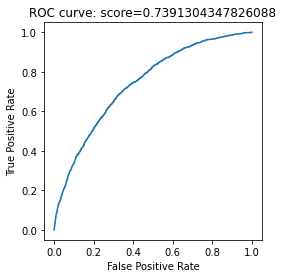

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_ROC(y_true, y_pred, auc):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.axis("Square")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve: score={auc}')
    plt.show()

y_pred = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)
plot_ROC(y_test, y_pred, auc)

## Feature importances
Let's plot all feature importances.

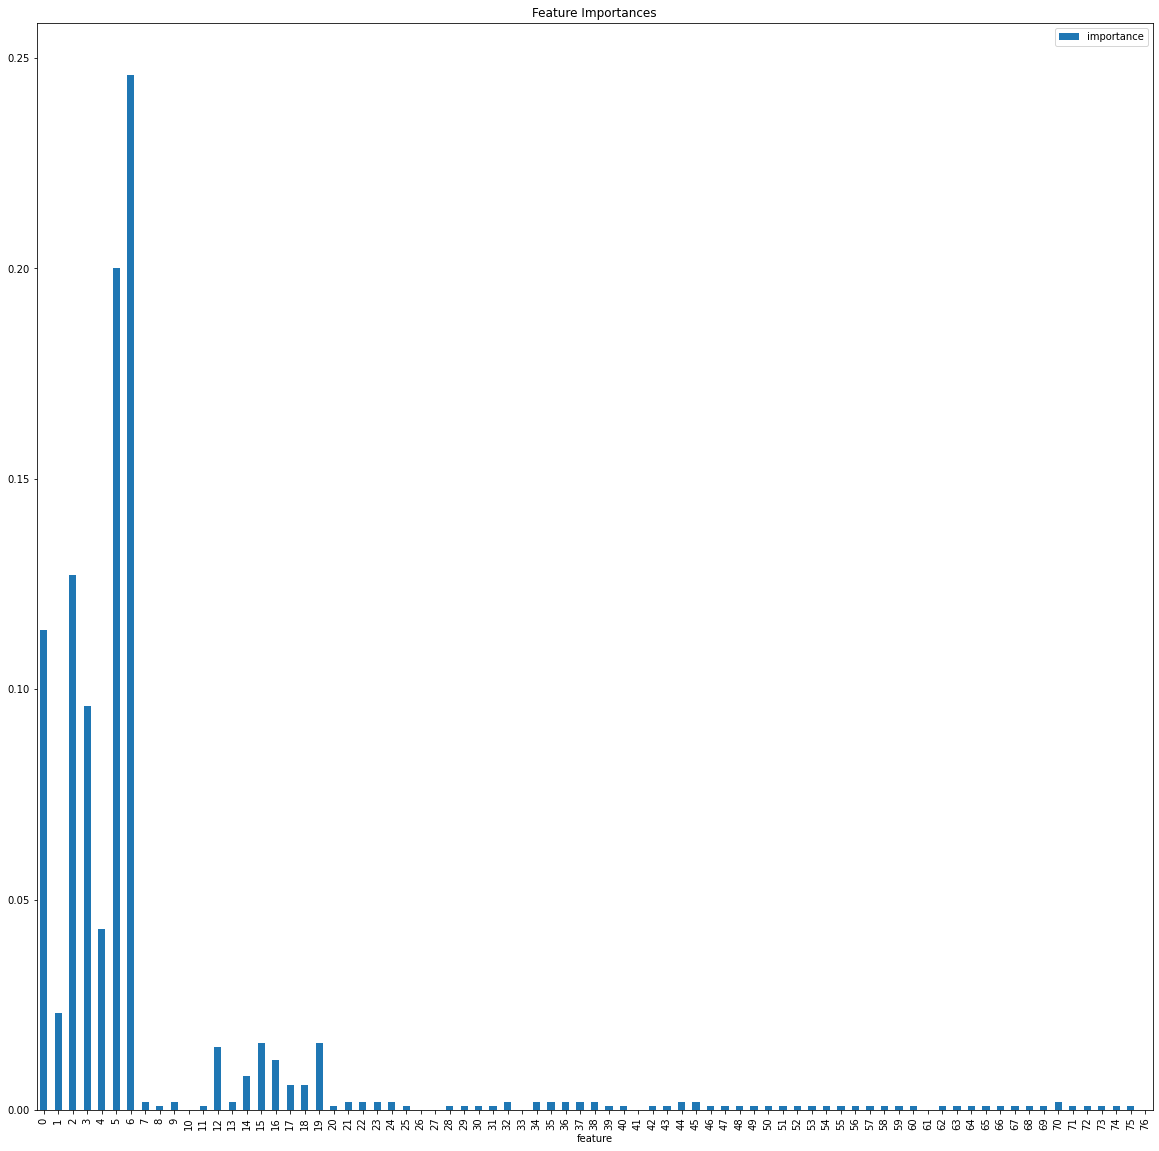

In [113]:
importances = model.named_steps['adaboostclassifier'].feature_importances_

feat_imp = pd.DataFrame({'importance':importances})    
feat_imp['feature'] = X_train.columns

feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.bar(title="Feature Importances", figsize=(20,20))
plt.show()


We see that there are 14 features which are the most important by a certain threshold.

In [111]:
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:14]
feat_imp

,importance
feature,
6,0.246
5,0.200
2,0.127
0,0.114
3,0.096
4,0.043
1,0.023
15,0.016
19,0.016


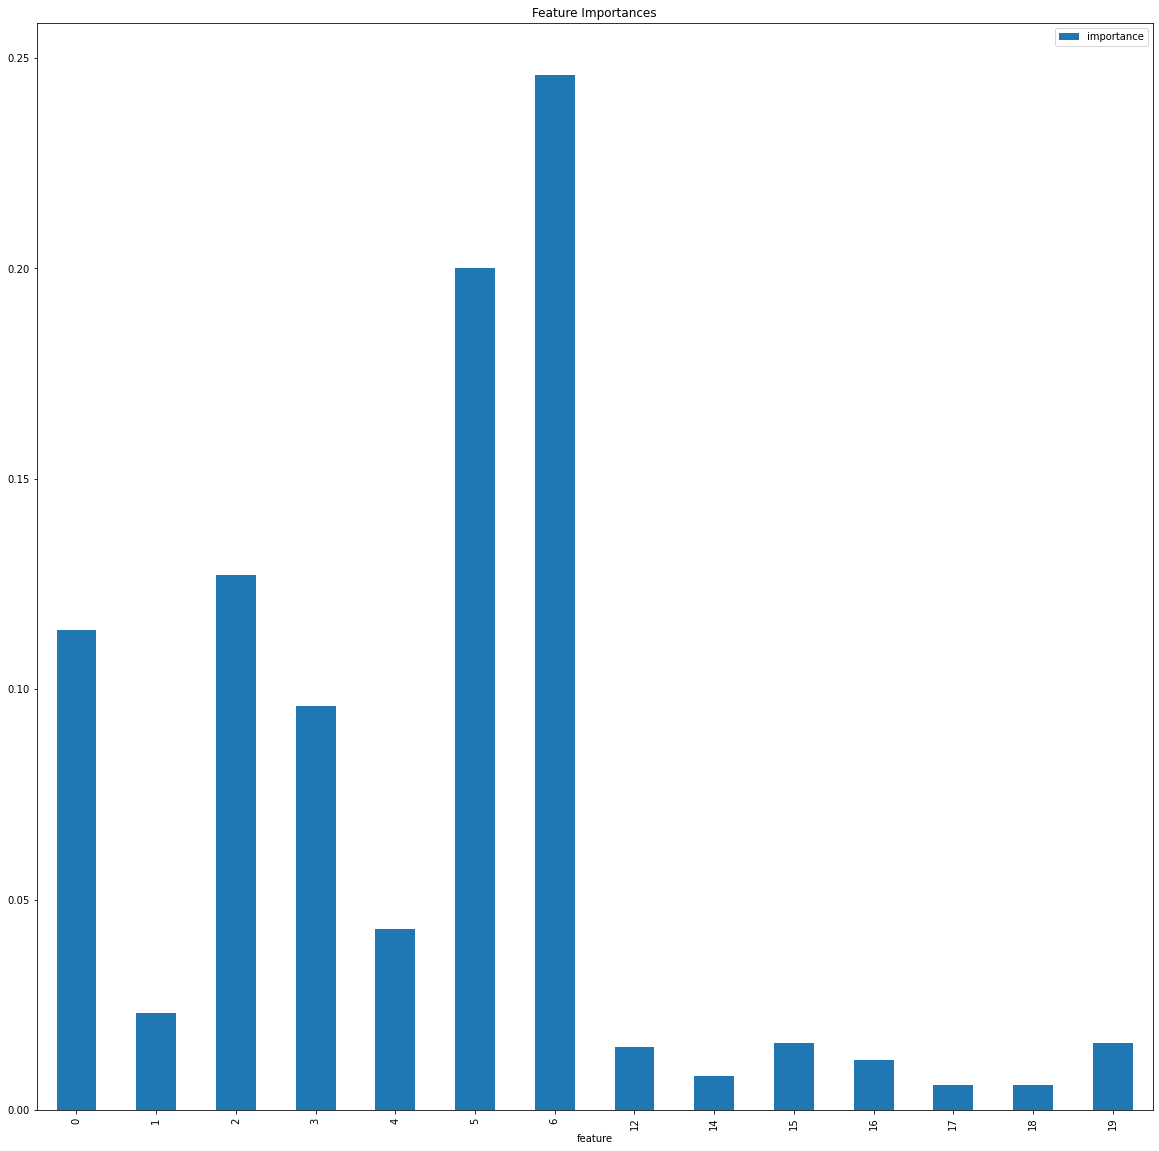

In [112]:
feat_imp.sort_values(by='feature', inplace=True)
feat_imp.plot.bar(title="Feature Importances", figsize=(20,20))
plt.show()